In [1]:
# Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

In [2]:
# Load data
ittfaFile = "../resources/ittfa_2009-2020.csv"
ittfa_df = pd.read_csv(ittfaFile)
ittfa_df.head()

,year,month,passengers_in,passengers_out,passengers_total,freight_in,freight_out,freight_total,mail_in,mail_out,...,flights_total,passengers_incl_transit_in,passengers_incl_transit_out,passengers_incl_transit_total,available_seats_in,available_seats_out,available_seats_total,seat_utilisation_in,seat_utilisation_out,seat_utilisation_total
0,2009,Jan,1223646,1025778,2249424,25791781,26785552,52577333,1744015,1013329,...,11811,1244404,1045681,2290085,1457769,1457446,2915215,85.363593,71.747495,78.556299
1,2009,Feb,969607,823540,1793147,27184874,27304789,54489663,1594689,909102,...,10177,989205,842937,1832142,1257714,1255734,2513448,78.651029,67.127035,72.893571
2,2009,Mar,937697,933843,1871540,31509322,29527013,61036335,1713906,1052860,...,11159,955905,952070,1907975,1370622,1372128,2742750,69.742424,69.386384,69.564306
3,2009,Apr,971404,1004204,1975608,28921311,26224702,55146013,1710087,890318,...,10951,986957,1019694,2006651,1341715,1340952,2682667,73.559362,76.042543,74.800600
4,2009,May,842073,922435,1764508,31179480,24396268,55575748,1870405,961951,...,10914,855367,935498,1790865,1341071,1342106,2683177,63.782380,69.703734,66.744199


In [9]:
ratioData = ittfa_df[['year','month','passengers_incl_transit_total','freight_total','mail_total','flights_total']]
ratioData.head()

,year,month,passengers_incl_transit_total,freight_total,mail_total,flights_total
0,2009,Jan,2290085,52577333,2757344,11811
1,2009,Feb,1832142,54489663,2503791,10177
2,2009,Mar,1907975,61036335,2766766,11159
3,2009,Apr,2006651,55146013,2600405,10951
4,2009,May,1790865,55575748,2832356,10914


In [14]:
ratioData['passengers_per_flight'] = ratioData.passengers_incl_transit_total / ratioData.flights_total
ratioData['freight_per_flight'] = ratioData.freight_total / ratioData.flights_total
ratioData['mail_per_flight'] = ratioData.mail_total / ratioData.flights_total
ratioData.head()

,year,month,passengers_incl_transit_total,freight_total,mail_total,flights_total,passengers_per_flight,freight_per_flight,mail_per_flight
0,2009,Jan,2290085,52577333,2757344,11811,193.894251,4451.556430,233.455592
1,2009,Feb,1832142,54489663,2503791,10177,180.027710,5354.197013,246.024467
2,2009,Mar,1907975,61036335,2766766,11159,170.980823,5469.695761,247.940317
3,2009,Apr,2006651,55146013,2600405,10951,183.239065,5035.705689,237.458223
4,2009,May,1790865,55575748,2832356,10914,164.088785,5092.152098,259.515851


In [18]:
ratioData['date'] = ratioData['month'].map(str)+ '-' +ratioData['year'].map(str)
ratioData['date'] = pd.to_datetime(ratioData['date'], format='%b-%Y').dt.strftime('%b-%Y')
ratioData


,year,month,passengers_incl_transit_total,freight_total,mail_total,flights_total,passengers_per_flight,freight_per_flight,mail_per_flight,date
0,2009,Jan,2290085,52577333,2757344,11811,193.894251,4451.556430,233.455592,Jan-2009
1,2009,Feb,1832142,54489663,2503791,10177,180.027710,5354.197013,246.024467,Feb-2009
2,2009,Mar,1907975,61036335,2766766,11159,170.980823,5469.695761,247.940317,Mar-2009
3,2009,Apr,2006651,55146013,2600405,10951,183.239065,5035.705689,237.458223,Apr-2009
4,2009,May,1790865,55575748,2832356,10914,164.088785,5092.152098,259.515851,May-2009
...,...,...,...,...,...,...,...,...,...,...
138,2020,Jul,73851,68331028,1624570,3046,24.245240,22433.036113,533.345371,Jul-2020
139,2020,Aug,71998,74106403,1607563,3309,21.758235,22395.407374,485.815352,Aug-2020
140,2020,Sep,62120,74914263,1707199,3279,18.944800,22846.679780,520.646234,Sep-2020
141,2020,Oct,69177,78271380,1828063,3607,19.178542,21699.855836,506.809814,Oct-2020


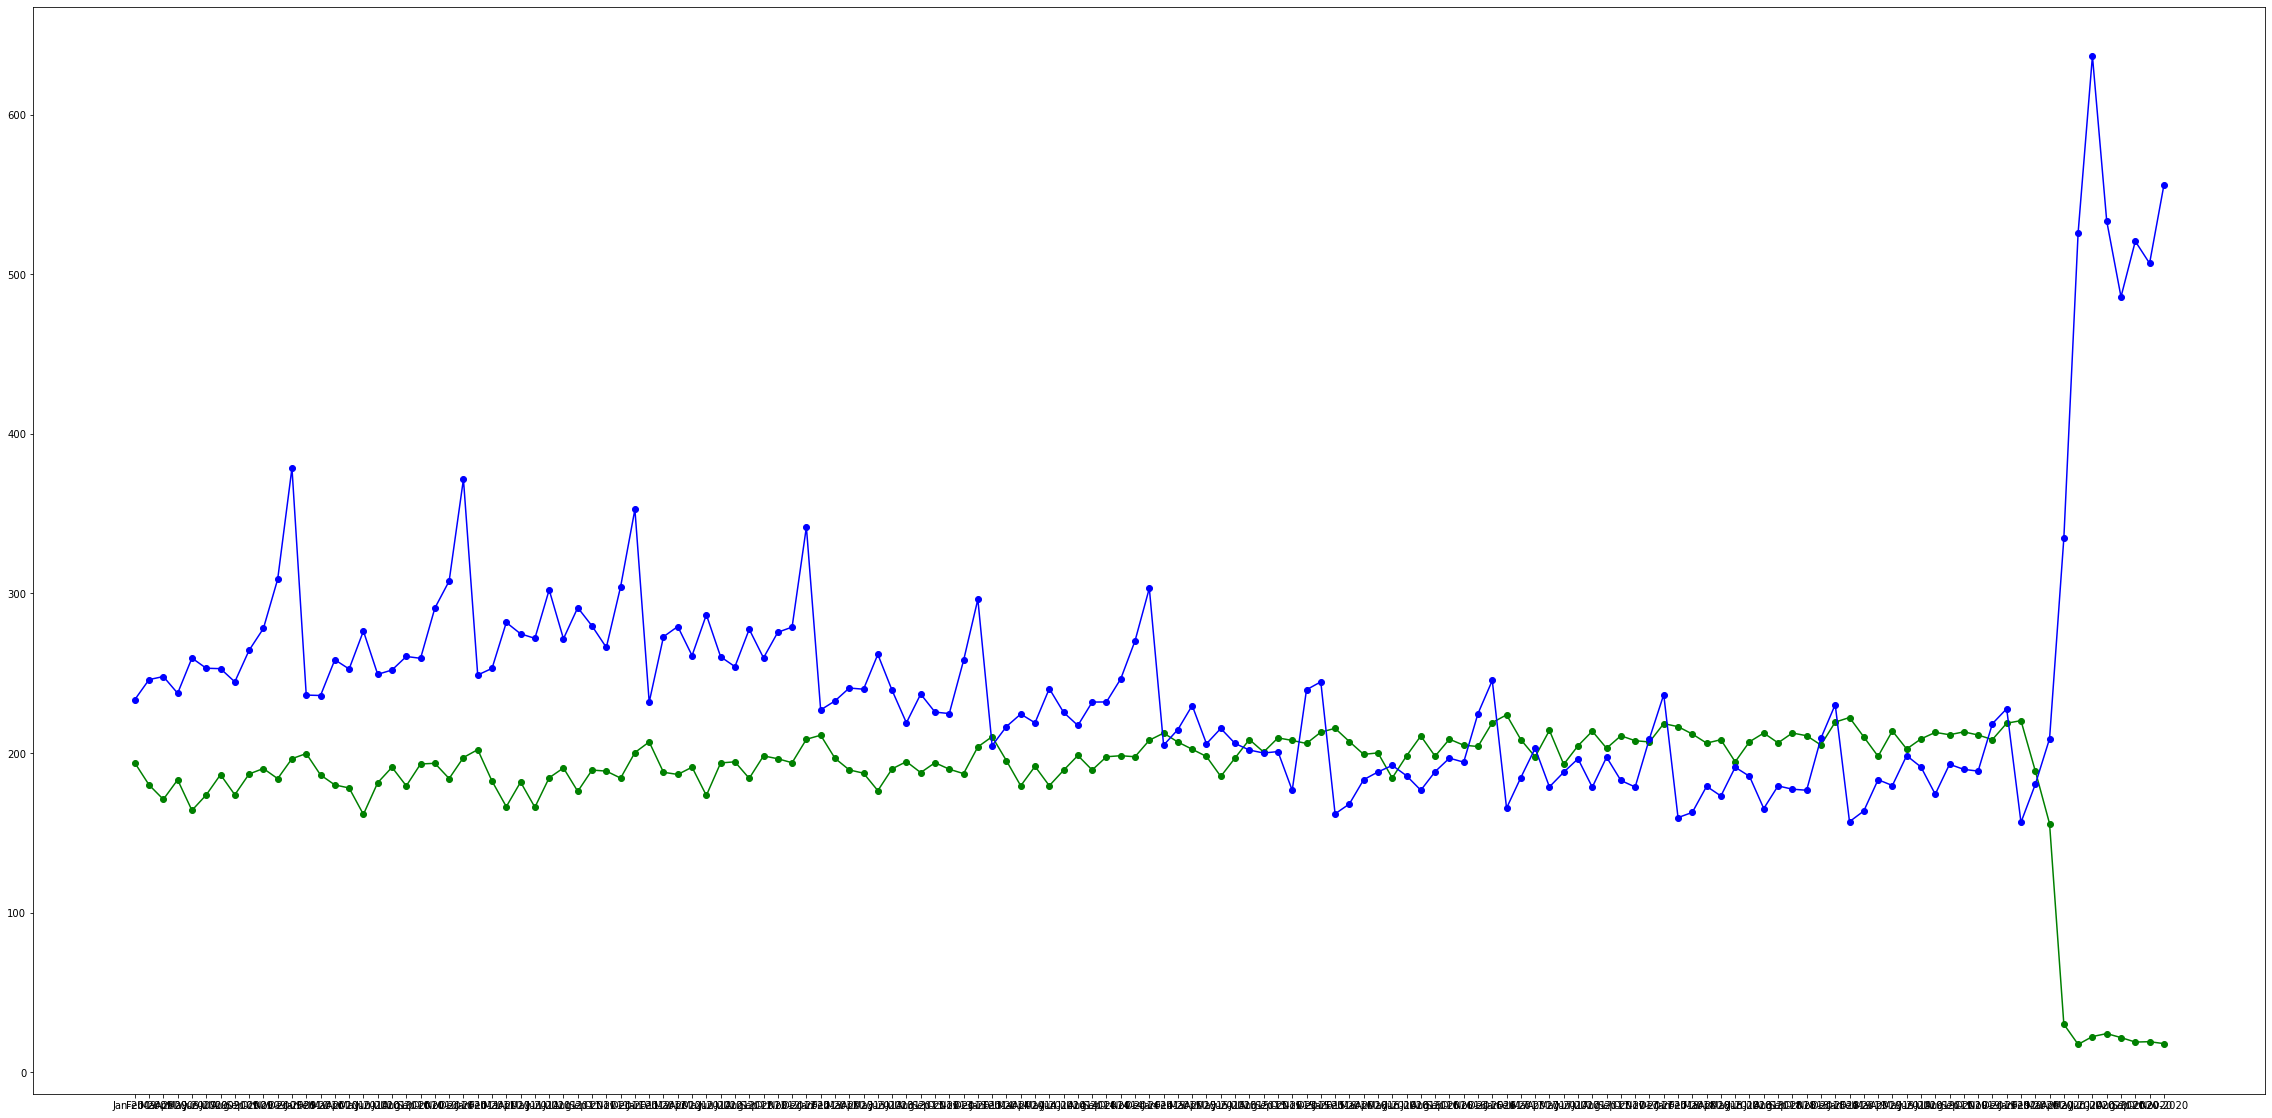

In [36]:
fig, ax1 = plt.subplots(figsize=(40,20))
ax1.plot_date(ratioData['date'], ratioData['passengers_per_flight'],linestyle='-',color='g')
ax1.plot_date(ratioData['date'], ratioData['mail_per_flight'],linestyle='-',color='b')
ax2 = ax1.twinx()
ax2.plot_date(ratioData['date'], ratioData['freight_per_flight'],linestyle='-',color='r')
plt.show()

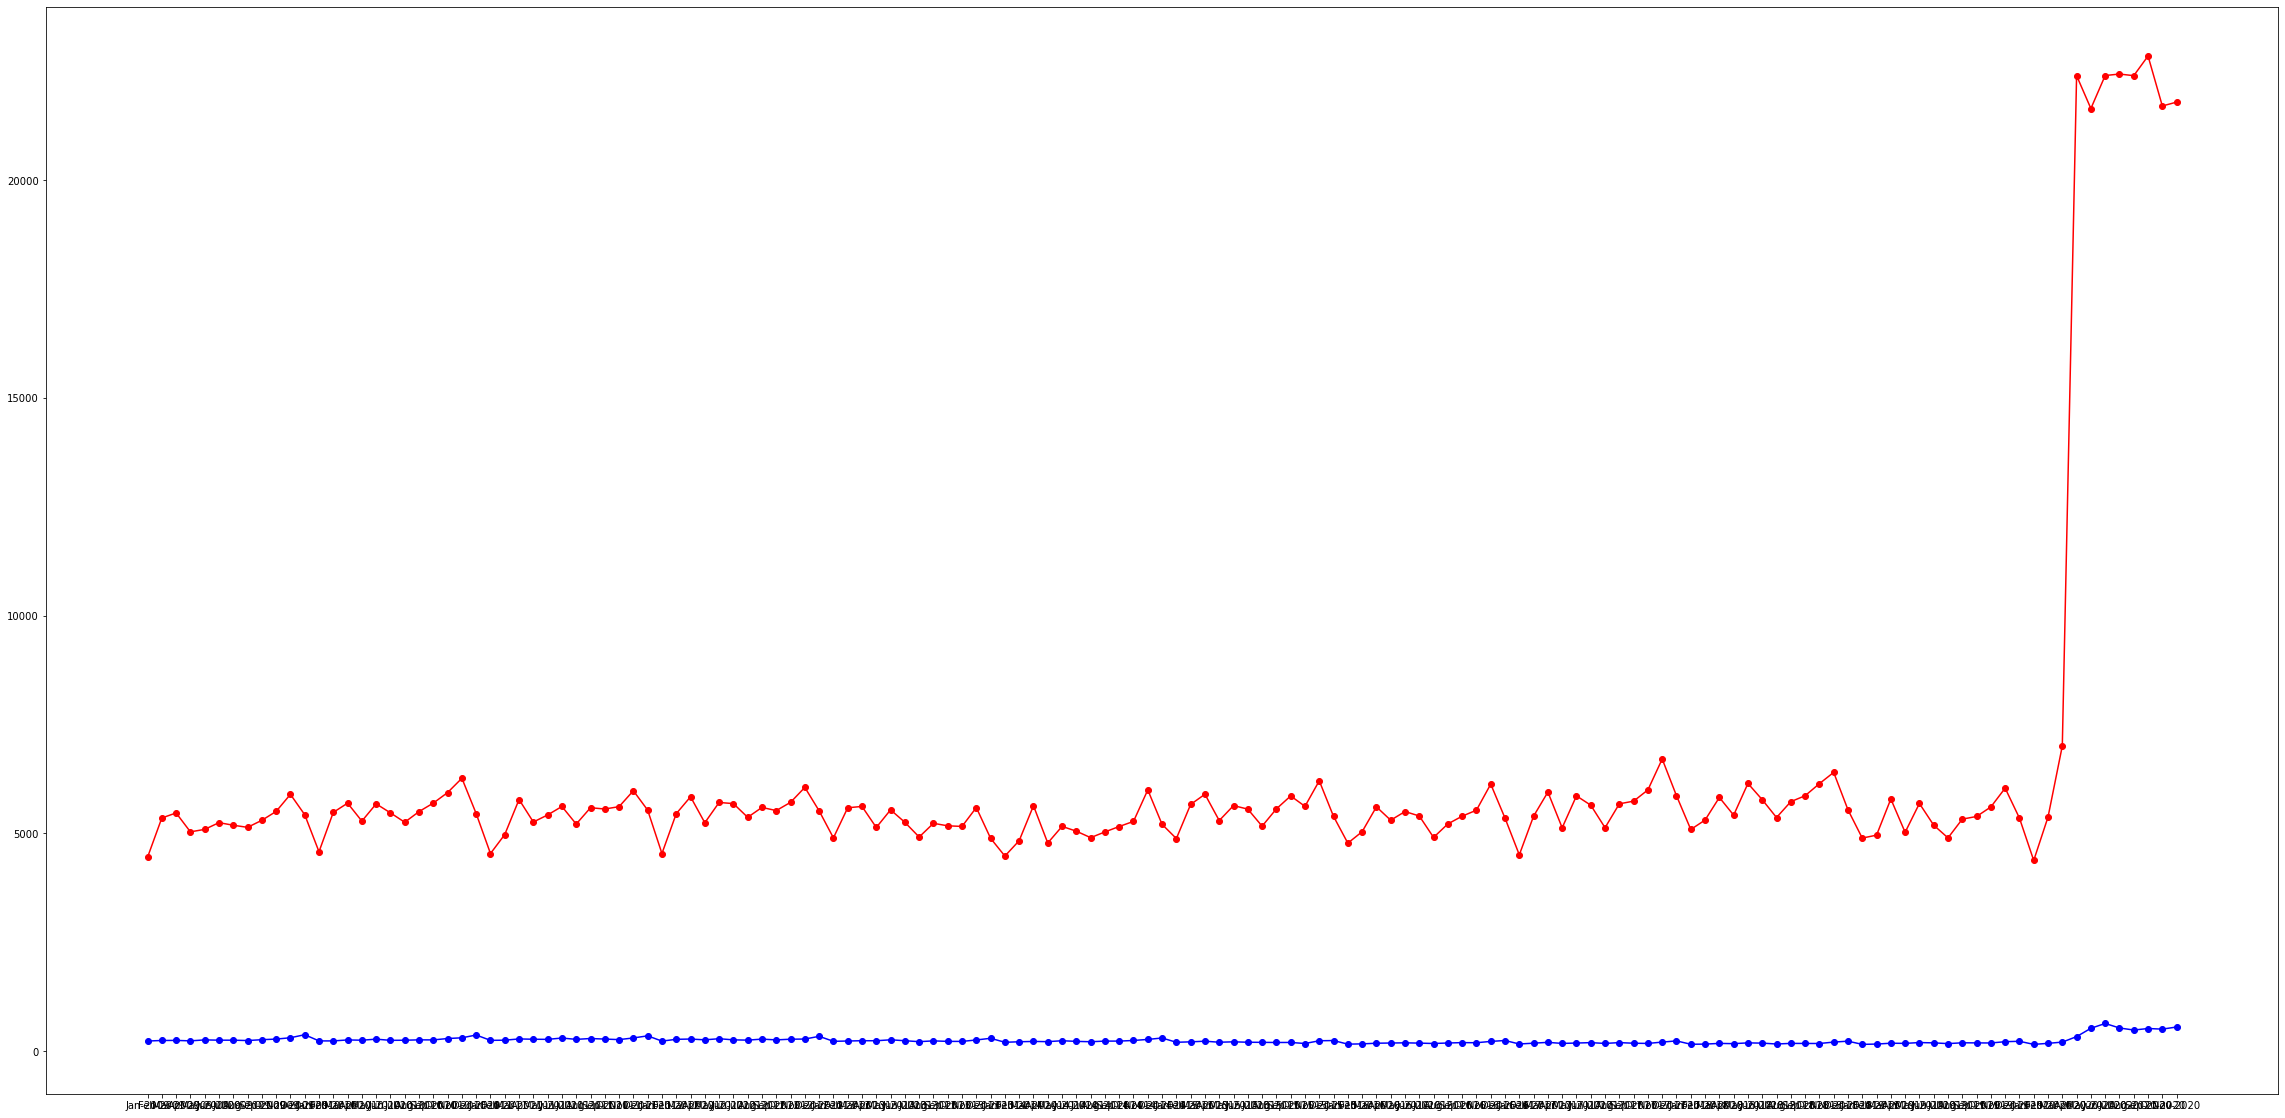

In [40]:
fig, ax1 = plt.subplots(figsize=(40,20))
ax1.plot_date(ratioData['date'], ratioData['freight_per_flight'],linestyle='-',color='r')
ax1.plot_date(ratioData['date'], ratioData['mail_per_flight'],linestyle='-',color='b')
# ax1.set_yscale('log')
plt.show()

In [46]:
ratioData_group = ratioData.groupby('year')
ratioData_group.sum()

,passengers_incl_transit_total,freight_total,mail_total,flights_total,passengers_per_flight,freight_per_flight,mail_per_flight
year,,,,,,,
2009,24764814,714355777,36434649,135848,2184.020843,63108.401053,3204.882255
2010,27121025,806401691,39706848,146041,2225.660259,66300.752647,3251.339187
2011,28551646,838471733,43826380,154653,2212.756255,65085.273060,3397.959485
2012,30499257,870105295,43156007,157796,2315.870055,66249.448696,3279.647896
2013,32297444,878794900,40615570,167723,2308.586628,63001.264534,2902.182303
2014,34196795,898783372,41450052,175515,2335.095517,61517.543192,2831.867237
2015,36014341,978847712,37361209,176349,2447.570301,66746.146096,2540.499528
2016,38933890,1016765274,36634805,190376,2450.201712,64166.822858,2306.009208
2017,41113457,1107732431,37767246,196864,2502.445879,67615.449613,2299.805849


In [45]:
ratioData_group['flights_total'].sum()

year
2009    135848
2010    146041
2011    154653
2012    157796
2013    167723
2014    175515
2015    176349
2016    190376
2017    196864
2018    204953
2019    206430
2020     71641
Name: flights_total, dtype: int64

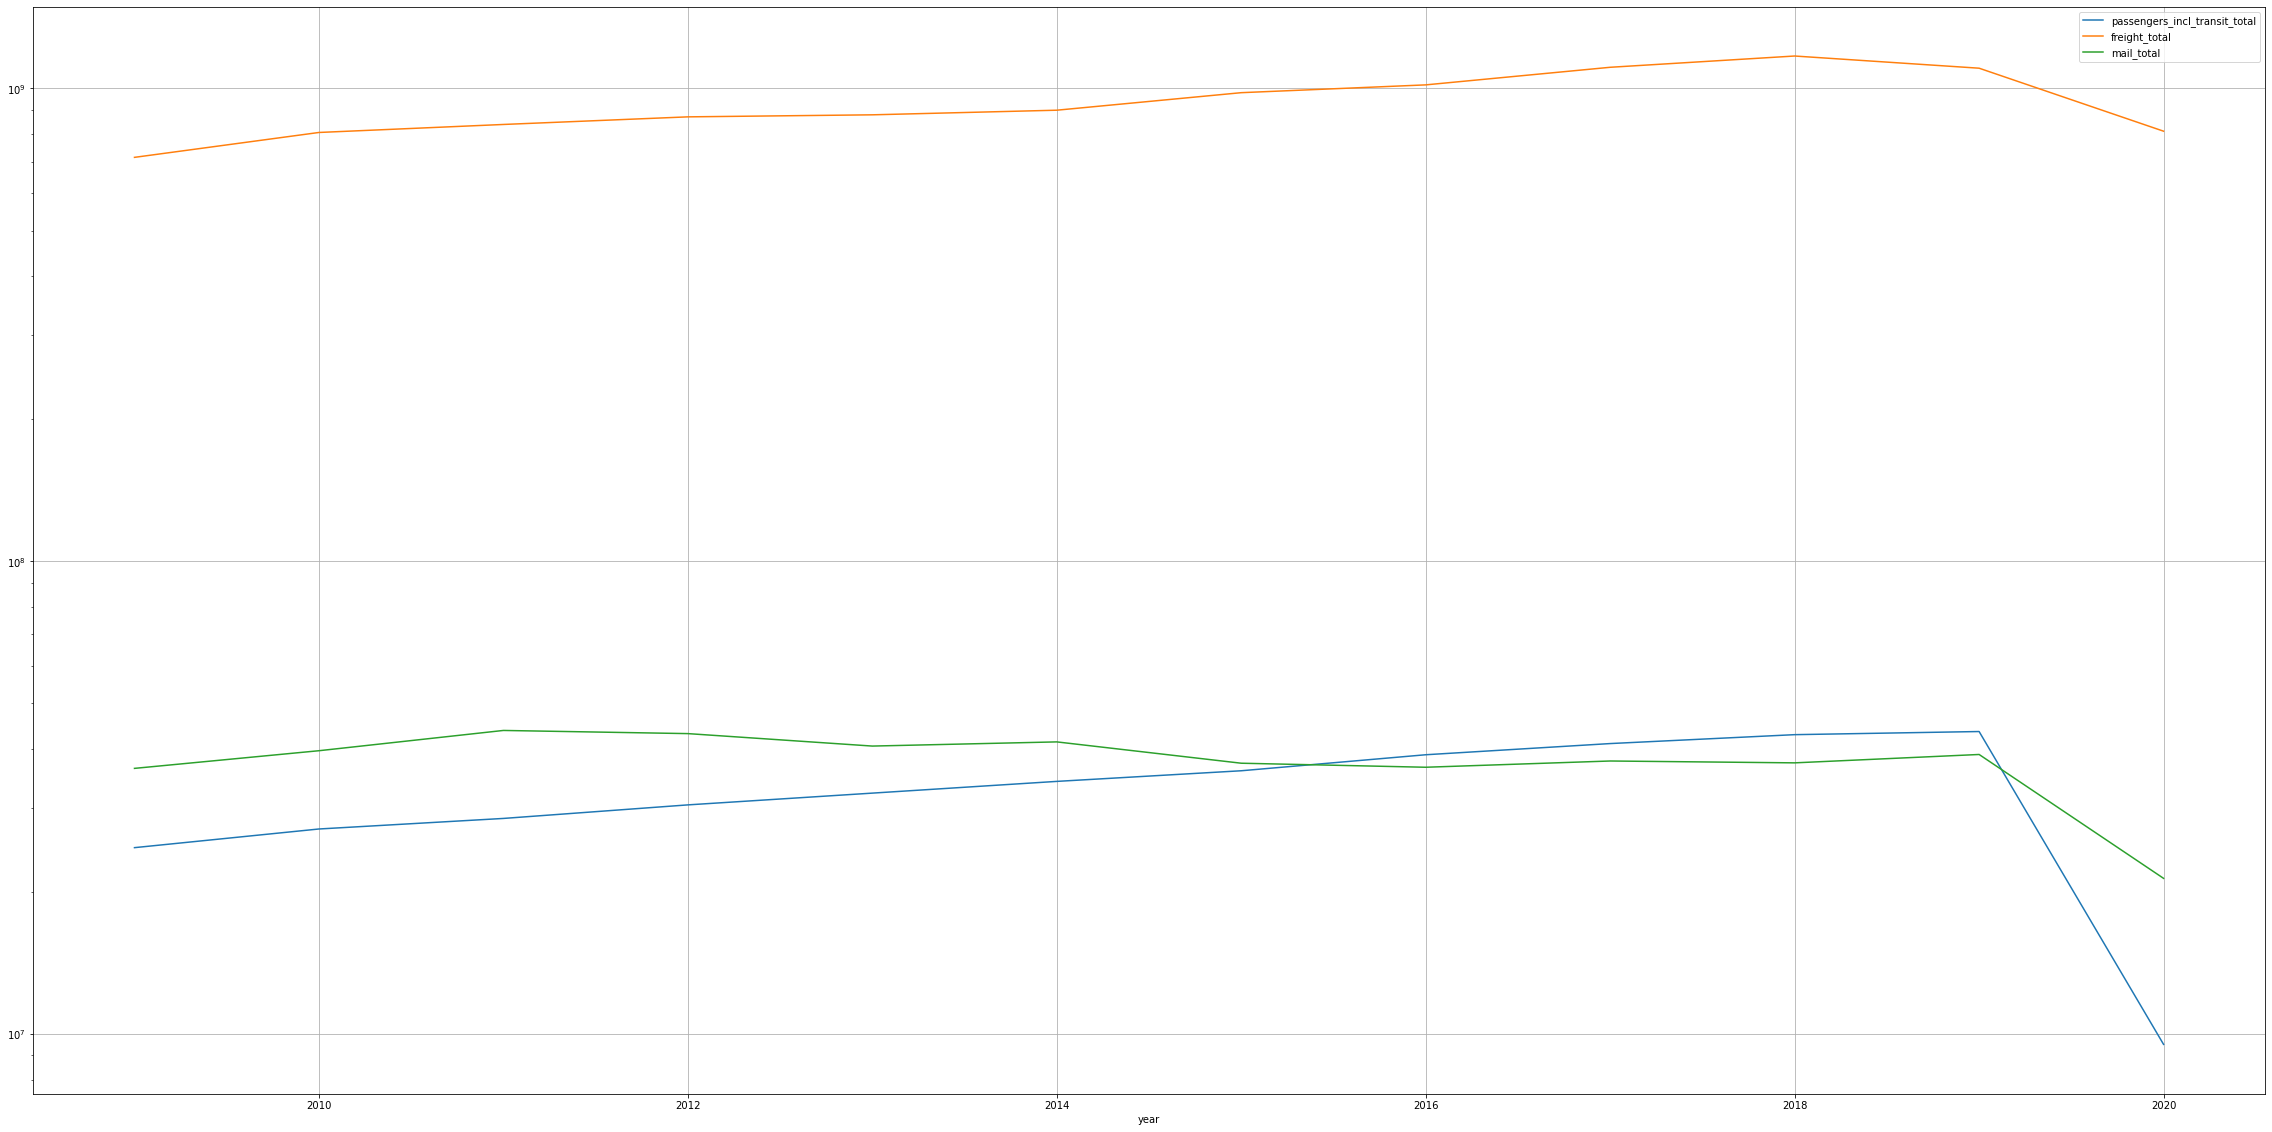

In [72]:
barPlot = ratioData_group[['passengers_incl_transit_total','freight_total','mail_total']].sum()
barPlot.plot(kind='line',figsize=(40,20))
plt.yscale('log')
plt.grid()